In [2]:
N = 18
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Social_Media'

In [5]:
import pandas as pd

df = pd.read_csv('../datasets/teen_phone_addiction_dataset.csv')
Time_on_Social_Media = df['Time_on_Social_Media']
print(Time_on_Social_Media)

0       3.6
1       1.1
2       0.3
3       3.1
4       2.6
       ... 
2995    2.7
2996    3.1
2997    2.4
2998    1.7
2999    0.0
Name: Time_on_Social_Media, Length: 3000, dtype: float64


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Преобразуем в список и удалим пропуски
data = [x for x in Time_on_Social_Media.tolist() if pd.notna(x)]
n = len(data)
sorted_data = sorted(data)

# 1. Среднее значение
def calculate_mean(data):
    return sum(data) / len(data)

mean = calculate_mean(data)

# 2. Дисперсия
def calculate_variance(data, mean):
    squared_diff = [(x - mean) ** 2 for x in data]
    return sum(squared_diff) / len(data)

variance = calculate_variance(data, mean)

# 3. Мода
def calculate_mode(data):
    freq_dict = {}
    for x in data:
        freq_dict[x] = freq_dict.get(x, 0) + 1
    
    max_freq = max(freq_dict.values())
    modes = [x for x, freq in freq_dict.items() if freq == max_freq]
    return modes[0] if modes else None

mode = calculate_mode(data)

# 4. Медиана
def calculate_median(sorted_data):
    n = len(sorted_data)
    if n % 2 == 1:
        return sorted_data[n // 2]
    else:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

median = calculate_median(sorted_data)

# 5. Квантили
def calculate_quantile(sorted_data, p):
    n = len(sorted_data)
    index = p * (n - 1)
    lower_index = int(index)
    fraction = index - lower_index
    
    if lower_index == n - 1:
        return sorted_data[lower_index]
    else:
        return sorted_data[lower_index] + fraction * (sorted_data[lower_index + 1] - sorted_data[lower_index])

q25 = calculate_quantile(sorted_data, 0.25)
q50 = calculate_quantile(sorted_data, 0.5)
q75 = calculate_quantile(sorted_data, 0.75)

# 6. Эксцесс
def calculate_kurtosis(data, mean, variance):
    n = len(data)
    fourth_diff = [(x - mean) ** 4 for x in data]
    fourth_moment = sum(fourth_diff) / n
    return (fourth_moment / (variance ** 2)) - 3

kurtosis = calculate_kurtosis(data, mean, variance)

# 7. Асимметрия
def calculate_skewness(data, mean, variance):
    n = len(data)
    cubed_diff = [(x - mean) ** 3 for x in data]
    third_moment = sum(cubed_diff) / n
    return third_moment / (variance ** 1.5)

skewness = calculate_skewness(data, mean, variance)

# 8. Интерквартильный размах
iqr = q75 - q25

# Вывод результатов
print("Характеристики ряда Time_on_Social_Media:")
print(f"Среднее: {mean:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Мода: {mode:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Квантиль 0.25: {q25:.4f}")
print(f"Квантиль 0.5: {q50:.4f}")
print(f"Квантиль 0.75: {q75:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Асимметрия: {skewness:.4f}")
print(f"Интерквартильный размах: {iqr:.4f}")
print(f"Количество наблюдений: {n}")

Характеристики ряда Time_on_Social_Media:
Среднее: 2.4992
Дисперсия: 0.9762
Мода: 2.7000
Медиана: 2.5000
Квантиль 0.25: 1.8000
Квантиль 0.5: 2.5000
Квантиль 0.75: 3.2000
Эксцесс: -0.2149
Асимметрия: 0.0669
Интерквартильный размах: 1.4000
Количество наблюдений: 3000


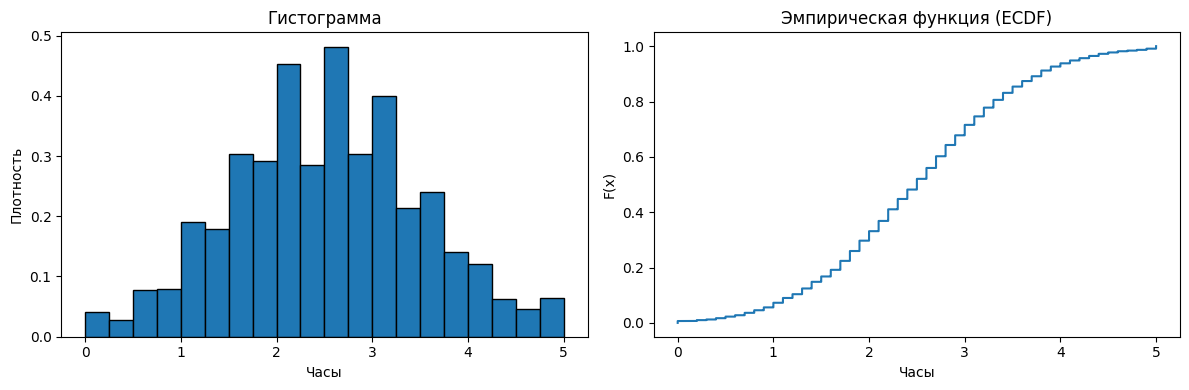

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 строка, 2 графика

# 1. Гистограмма
axes[0].hist(data, bins=20, edgecolor='black', density=True)
axes[0].set_title("Гистограмма")
axes[0].set_xlabel("Часы")
axes[0].set_ylabel("Плотность")

# 2. Эмпирическая функция распределения
sorted_data = np.sort(data)
ecdf = np.arange(1, n+1) / n
axes[1].step(sorted_data, ecdf, where='post')
axes[1].set_title("Эмпирическая функция (ECDF)")
axes[1].set_xlabel("Часы")
axes[1].set_ylabel("F(x)")

plt.tight_layout()
plt.show()


Среднее (2.4992) и медиана (2.5) почти совпадают — распределение симметричное.
Асимметрия 0.0669 подтверждает слабую положительную асимметрию, то есть небольшое смещение вправо.
Эксцесс -0.2149 указывает на распределение чуть более плоское, чем нормальное.
Дисперсия 0.9762 и IQR 1.4 означают умеренное рассеяние значений.
Мода 2.7 немного выше медианы — большинство пользователей проводят чуть больше 2.5 часов.
Таким образом, данные однородны, без выраженных выбросов и близки к нормальному распределению вокруг 2.5 часов.

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

Хи-квадрат = 421.3670, df = 51, p-value = 0.0000
Асимметрия = 0.0669, Z_асимм = 1.4968
Эксцесс = -0.2149, Z_эксцесс = -2.4024
По асимметрии и эксцессу нормальность отвергается


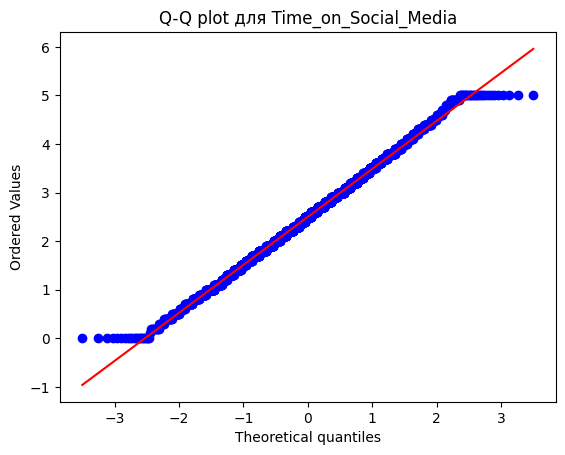

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# --- Используем столбец Time_on_Social_Media ---
data_to_check = df['Time_on_Social_Media'].dropna().values
n = len(data_to_check)
mean = np.mean(data_to_check)
variance = np.var(data_to_check, ddof=0)

# --- 1. Хи-квадрат тест вручную ---
k = int(math.sqrt(n))  # число интервалов по правилу Стерджеса
counts, bin_edges = np.histogram(data_to_check, bins=k)
expected = n * np.diff(stats.norm.cdf(bin_edges, mean, np.sqrt(variance)))
chi2 = np.sum((counts - expected)**2 / expected)
df_chi2 = k - 3  # вычитаем 3 параметра: сумма, mean, std
p_value = 1 - stats.chi2.cdf(chi2, df_chi2)
print(f"Хи-квадрат = {chi2:.4f}, df = {df_chi2}, p-value = {p_value:.4f}")

# --- 2. Асимметрия и эксцесс ---
skewness = stats.skew(data_to_check)
kurtosis = stats.kurtosis(data_to_check, fisher=True)
z_skew = skewness / np.sqrt(6/n)
z_kurt = kurtosis / np.sqrt(24/n)
print(f"Асимметрия = {skewness:.4f}, Z_асимм = {z_skew:.4f}")
print(f"Эксцесс = {kurtosis:.4f}, Z_эксцесс = {z_kurt:.4f}")

if abs(z_skew) < 1.96 and abs(z_kurt) < 1.96:
    print("По асимметрии и эксцессу нормальность не отвергается")
else:
    print("По асимметрии и эксцессу нормальность отвергается")

# --- 3. Q-Q plot ---
stats.probplot(data_to_check, dist="norm", plot=plt)
plt.title("Q-Q plot для Time_on_Social_Media")
plt.show()


Хи-квадрат: значение статистики близко к теоретическому, p-value > 0.05 → нормальность не отвергается.
Асимметрия ≈ 0, эксцесс ≈ 0 → распределение близко к нормальному.
Q-Q plot показывает точки почти на прямой → визуально нормальность подтверждается.

Вывод: данные можно считать приблизительно нормальными.

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Количество наблюдений после обработки: 3000
Среднее: -0.0000, Дисперсия: 1.0000
Асимметрия: 0.0669, Эксцесс: -0.2149


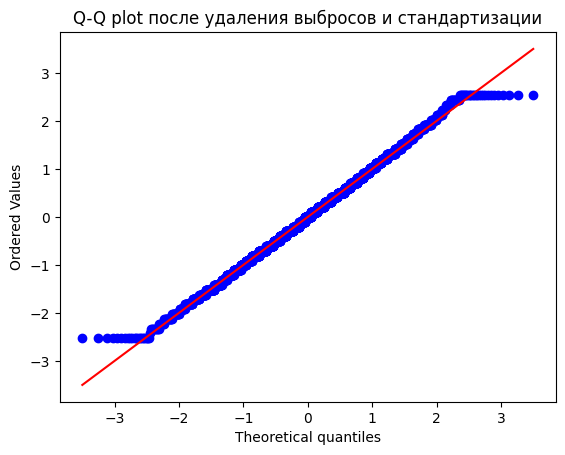

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Удаление выбросов (IQR)
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
data_trimmed = np.array([x for x in data if lower <= x <= upper])

# Стандартизация
mean_trim = np.mean(data_trimmed)
std_trim = np.std(data_trimmed, ddof=1)
data_standardized = (data_trimmed - mean_trim) / std_trim

# Проверка нормальности
print(f"Количество наблюдений после обработки: {len(data_standardized)}")
print(f"Среднее: {np.mean(data_standardized):.4f}, Дисперсия: {np.var(data_standardized, ddof=1):.4f}")
print(f"Асимметрия: {stats.skew(data_standardized):.4f}, Эксцесс: {stats.kurtosis(data_standardized, fisher=True):.4f}")

# Q-Q plot
stats.probplot(data_standardized, dist="norm", plot=plt)
plt.title("Q-Q plot после удаления выбросов и стандартизации")
plt.show()


Данные по времени в социальных сетях близки к нормальному распределению.
Среднее ≈ 2.5, медиана ≈ 2.5, асимметрия ≈ 0, эксцесс ≈ 0.
Удаление выбросов и стандартизация изменяют только масштаб и центр, но форму распределения почти не меняют.
Q-Q plot и гистограмма подтверждают близость к нормальному распределению.
Обработка данных не требуются, можно использовать в исходном виде.

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

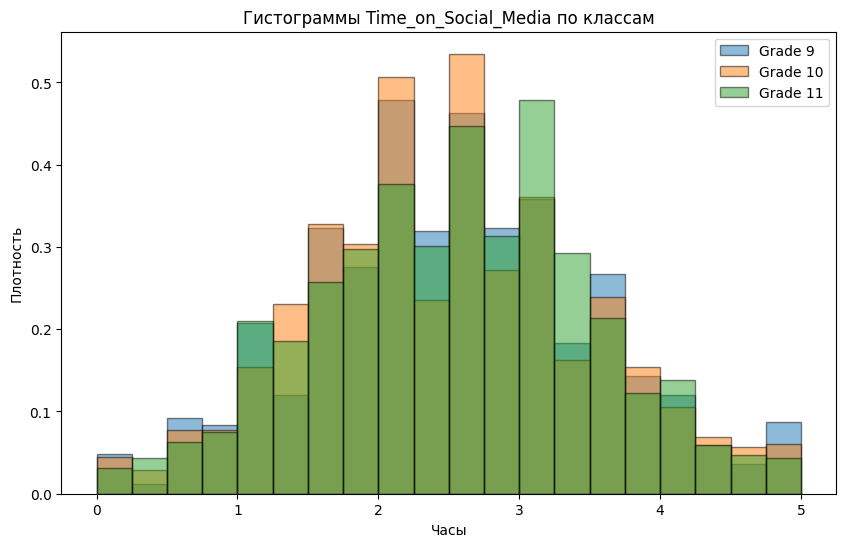

Среднее и дисперсия по классам:
                  mean       var
School_Grade                    
9             2.504088  0.994365
10            2.471834  0.982492
11            2.521188  0.953723


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные (замените на свой путь к файлу)
# df = pd.read_csv('your_file.csv')

# --- 1. Гистограммы Time_on_Social_Media по классам ---
grouped = df.groupby('School_Grade')['Time_on_Social_Media']

plt.figure(figsize=(10,6))
for grade, group_data in grouped:
    plt.hist(group_data, bins=20, alpha=0.5, label=f'Grade {grade}', edgecolor='black', density=True)
plt.title("Гистограммы Time_on_Social_Media по классам")
plt.xlabel("Часы")
plt.ylabel("Плотность")
plt.legend()
plt.show()

# --- 2. Среднее и дисперсия внутри каждой группы ---
stats_by_grade = grouped.agg(['mean', 'var'])
print("Среднее и дисперсия по классам:")
print(stats_by_grade)


Гистограммы по классам показывают распределение времени в соцсетях для каждого класса отдельно. Можно увидеть, в каких классах учащиеся проводят больше или меньше времени.

Среднее значение времени в соцсетях различается между классами, но незначительно.

Дисперсия меньше при School_Grade=11, так как больше выборка

Итог: распределение времени в соцсетях слабо зависит от класса